In [3]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

from comet_ml import Experiment

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import sys
sys.path.append("../")

from beth.game import Game
from beth.players.random_player import RandomPlayer
from beth.players.human_player import HumanPlayer
from beth.players.sequence import SequenceGame,SequencePlayer
from beth.ai import TreeSearchAI
from beth.tree.tree import MoveTree

# Playground

In [84]:
white = HumanPlayer()
black = TreeSearchAI(breadth = 1,depth = 10)

game = Game(white,black)

In [81]:
game.move(('e4','g6','c4', 'Nc6', 'c5', 'd5', 'Qh5', 'Bg4', 'h4', 'Bxh5', 'b4'))

[0, 0, 0, 0, 0, 0, 0, 0, 0, -9, 0]

In [83]:
game.replay()

interactive(children=(Play(value=0, description='Press play', interval=500, max=11), Output()), _dom_classes=(…

IntSlider(value=0, max=11)

In [65]:
m = game.board.moves

In [66]:
m

[♙ WHITE PAWN e2 -> e4, ♟ BLACK PAWN b7 -> b5]

In [50]:
m

[♙ WHITE PAWN e2 -> e4,
 ♟ BLACK PAWN h7 -> h5,
 ♙ WHITE PAWN c2 -> c4,
 ♟ BLACK PAWN d7 -> d5,
 ♙ WHITE PAWN c4 -> c5,
 ♛ BLACK QUEEN d8 -> d7,
 ♕ WHITE QUEEN d1 -> h5 (+1),
 ♜ BLACK ROOK h8 -> h6,
 ♙ WHITE PAWN h2 -> h4,
 ♜ BLACK ROOK h6 -> d6,
 ♙ WHITE PAWN b2 -> b4]

In [52]:
x = m[1]

In [58]:
x.color

'BLACK'

In [47]:
game.replay()

interactive(children=(Play(value=0, description='Press play', interval=500, max=11), Output()), _dom_classes=(…

IntSlider(value=0, max=11)

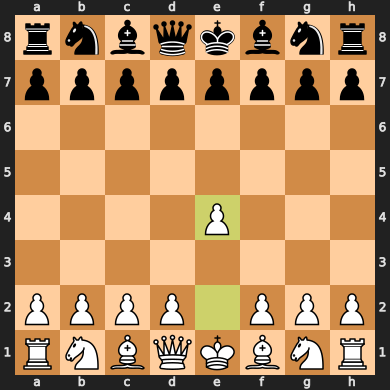

In [85]:
game.move("e4")
game

In [86]:
tree = MoveTree(game.board)

In [87]:
x = tree.search_depth(breadth = 2,depth = 10)

In [88]:
x

,names,scores,total
419,"(Na6, Na3, d6, Nb1, Bg4, g3, Bxd1, c4, Bf3, Nc3)","(0, 0, 0, 0, 0, 0, -9, 0, 0, 0)",9
420,"(Na6, Na3, d6, Nb1, Bg4, g3, Bxd1, c4, Bf3, Bd3)","(0, 0, 0, 0, 0, 0, -9, 0, 0, 0)",9
421,"(Na6, Na3, d6, Nb1, Bg4, g3, Bxd1, c4, Nc5, Bd3)","(0, 0, 0, 0, 0, 0, -9, 0, 0, 0)",9
417,"(Na6, Na3, d6, Nb1, Bg4, g3, Bxd1, Bb5+, c6, Nf3)","(0, 0, 0, 0, 0, 0, -9, 0, 0, 0)",9
416,"(Na6, Na3, d6, Nb1, Bg4, g3, Bxd1, Bb5+, Qd7, ...","(0, 0, 0, 0, 0, 0, -9, 0, 0, 0)",9
...,...,...,...
174,"(Na6, Ne2, h5, Nd4, f5, Ne2, Nb4, a3, Nd3+, cxd3)","(0, 0, 0, 0, 0, 0, 0, 0, 0, 3)",-3
142,"(Na6, Ne2, h5, Nd4, Nc5, f4, Nd3+, Bxd3, e6, Kf1)","(0, 0, 0, 0, 0, 0, 0, 3, 0, 0)",-3
446,"(Na6, Na3, d6, Nb1, Bg4, Qxg4, c6, Qh5, Kd7, Q...","(0, 0, 0, 0, 0, 3, 0, 0, 0, 1)",-4
439,"(Na6, Na3, d6, Nb1, Bg4, Qxg4, c6, f3, f5, Qxg7)","(0, 0, 0, 0, 0, 3, 0, 0, 0, 1)",-4


In [41]:
x.iloc[0]["names"]

('g6', 'c4', 'Nc6', 'c5', 'd5', 'Qh5', 'Bg4', 'h4', 'Bxh5', 'b4')

In [42]:
game.move(('g6', 'c4', 'Nc6', 'c5', 'd5', 'Qh5', 'Bg4', 'h4', 'Bxh5', 'b4'))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [43]:
game.replay()

interactive(children=(Play(value=0, description='Press play', interval=500, max=11), Output()), _dom_classes=(…

IntSlider(value=0, max=11)

In [199]:
x.iloc[-1]["names"]

('e4', 'd5', 'Qh5', 'h6', 'Qg6', 'fxg6')

In [176]:
from beth.tree.tree import MoveTree
from beth.move import Move

tree = MoveTree(game.board)

In [177]:
x = tree.search_depth(breadth = 5,depth = 6)

Searching for 6 moves ahead with 5 choices - 15625 possibilities


In [181]:
x.iloc[0]["names"]

('a3', 'e5', 'Nf3', 'Bb4', 'axb4', 'e4')

In [147]:
score,moves = zip(*[(y.score,y.move_str) for y in x[0]])

In [148]:
score

(0, 0, 0)

In [127]:
tree.children[0].children[0].stack

[♘ WHITE KNIGHT g1 -> h3, ♟ BLACK PAWN g7 -> g6]

In [ ]:
for 

In [103]:
tree.children[0].move.move_str

'b3'